In [121]:
%matplotlib ipympl
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.elements import element
from impedance.visualization import plot_nyquist, plot_bode
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import pandas as pd
from scipy import stats

In [122]:
def give_weights(z,wt):
    if (wt=="mod"):
        return np.concatenate((np.abs(z),np.abs(z)))
    elif (wt=="prop"):
        return np.concatenate((np.real(z),np.imag(z)))
    elif (wt=="" or wt=="unit"):
        return np.ones(2*len(z))

In [123]:
@element(num_params=4, units=["Ohm","Ohm", "F", ""],overwrite=True)
def TLMuni(p, f):
    omega = 2 * np.pi * np.array(f)
    R, Rion, Q, alpha = p[0], p[1], p[2], p[3]
    S=Rion*Q*(1j*omega)**alpha
    Z= R+Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))
    return Z

@element(num_params=4, units=["Ohm","Ohm", "F", ""],overwrite=True)
def TLMuniEC(p, f):
    omega = 2 * np.pi * np.array(f)
    R, Rion, tau, alpha = p[0], p[1], p[2], p[3]
    S=(1j*omega*tau)**alpha
    Z= R+Rion*np.sqrt(1/S)*(1/(np.tanh(np.sqrt(S))))
    return Z

In [124]:
exp_data=pd.read_excel("abhi experimental through plane data.xlsx",header=None)
exp_data=exp_data.to_numpy()
z_exp_data=exp_data[:,1]+1j*exp_data[:,2]
freq_exp_data=exp_data[:,0]
#freq_exp_data

In [125]:
c_abhi_data=CustomCircuit(initial_guess=[41,1000,1,0.8],circuit="TLMuni")
c_fit_abhi=c_abhi_data.fit(freq_exp_data,z_exp_data,sigma=give_weights(z_exp_data,"prop"),bounds=[(0,0,0,0),(np.inf,np.inf,np.inf,1)])
# c_EC=CustomCircuit(initial_guess=[40,530,1,0.9],circuit="TLMuniEC")
# c_pred=c_abhi_data.fit(freq_exp_data,z_exp_data,bounds=[(0,0,0,0),(np.inf,np.inf,np.inf,1)])
# c_pred_EC=c_EC.fit(freq_exp_data,z_exp_data,bounds=[(0,0,0,0),(np.inf,np.inf,np.inf,1)])

pp=c_fit_abhi.parameters_
pp=np.asarray(pp)
pp=np.transpose(pp)
pp

C:\Users\admin\AppData\Local\Temp\ipykernel_59184\4034769062.py:6: RuntimeWarning: overflow encountered in tanh
  Z= R+Rion*np.sqrt(1/(S))*(1/(np.tanh(np.sqrt(S))))


array([3.99552029e+01, 4.78984477e+02, 1.88113877e-03, 8.23313496e-01])

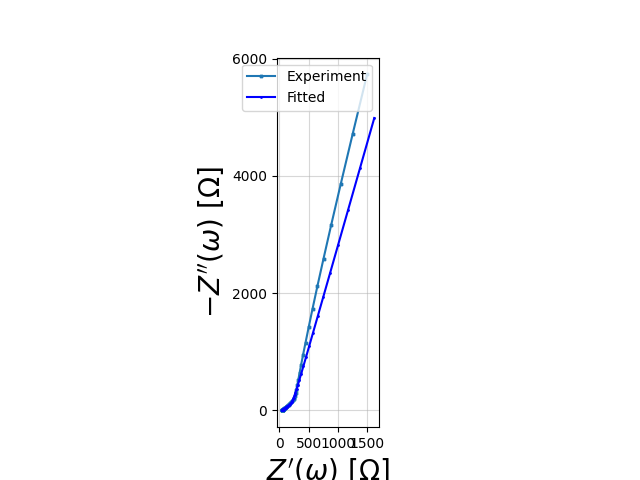

In [126]:

z_pred=c_fit_abhi.predict(freq_exp_data)
fg, ax=plt.subplots()
plot_nyquist(z_exp_data,ax=ax,fmt="-X",ms=2,label="Experiment")
plot_nyquist(z_pred,ax=ax,fmt="-o",color="blue",ms=1,label="Fitted")
ax.legend()
